<a href="https://colab.research.google.com/github/kuni007/BayesBook/blob/master/GTC_2018_CoLab_ipynb_%E3%81%AE20210512_Pytorch%E2%86%92Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# -*- coding: utf-8 -*-

## "Detection of Anomalies in Financial Transactions using Deep Autoencoder Networks"


The content of this "GPU Technology Conference (GTC) 2018, Silicon Valley" lab was jointly developed by Marco Schreyer and Timur Sattarov. Please don't hesitate to contact us in case of any questions via marco.schreyer@dfki.de and sattarov.timur@pwc.com.

この「GPU Technology Conference (GTC) 2018, Silicon Valley」ラボのコンテンツは、Marco Schreyer氏とTimur Sattarov氏の共同開発によるものです。ご不明な点がございましたら、<a href="mailto:marco.schreyer@dfki.de">marco.schreyer@dfki.de</a>および<a href="mailto:sattarov.timur@pwc.com">sattarov.timur@pwc.com</a>までご遠慮なくお問い合わせください。

## 1. Introduction and Lab Overview

### 1.1 Fraud and Accounting Information Systems (AIS)

The Association of Certified Fraud Examiners estimates in its Global Fraud Study 2016 [1] that the typical organization loses 5% of its annual revenues due to fraud. According to Joseph T. Wells [2] the term **"fraud"** refers to, 

Association of Certified Fraud Examinersは、Global Fraud Study 2016 [1]の中で、典型的な組織は不正行為によって年間収益の5%を失っていると推定しています。ジョセフ・T・ウェルズ[2]によると、**「不正」**という言葉は以下を指します。

>_"the abuse of one's occupation for personal enrichment through the deliberate misuse of an organization's resources or assets"_. 

>_「組織の資源や資産を意図的に悪用し、個人的な利益のために職業を乱用すること」_。

A similar more recent study, conducted by the auditors of PwC, revealed that 30% of the study respondents experienced losses of between \$100,000 and \$5 million USD [3] in the last 24 months. The study also showed that financial statement fraud caused by far the greatest median loss of the surveyed fraud schemes.

PwCの監査法人が実施した同様の最近の調査では、調査対象者の30%が過去24カ月間に10万ドルから500万ドルの損失を経験していることが明らかになっています[3]。この調査では、調査対象となった不正スキームの中で、財務諸表の不正が最も大きな損失額（中央値）をもたらしたことも明らかになっています。

At the same time organizations accelerate the digitization and reconfiguration of business processes [4] affecting in particular Accounting Information Systems (AIS) or more general Enterprise Resource Planning (ERP) systems.

同時に、組織はビジネスプロセスのデジタル化と再構成を加速させており [4]、特に会計情報システム (AIS) や、より一般的なエンタープライズリソースプランニング (ERP) システムに影響を与えています。

<img align="middle" style="max-width: 550px; height: auto" src="https://github.com/GitiHubi/deepAI/blob/master/images/accounting.png?raw=1">

**Figure 1:** Hierarchical view of an Accounting Information System (AIS) that records distinct layers of abstraction, namely (1) the business process information, (2) the accounting information as well as the (3) technical journal entry information in designated database tables.

**図1：**1）ビジネスプロセス情報、（2）会計情報、（3）技術的な仕訳情報の3つの抽象化された層を、指定されたデータベーステーブルに記録する会計情報システム（AIS）の階層的な見方

Steadily, these systems collect vast quantities of electronic evidence at an almost atomic level. This holds in particular for the journal entries of an organization recorded in its general ledger and sub-ledger accounts. SAP, one of the most prominent ERP software providers, estimates that approx. 76% of the world's transaction revenue touches one of their systems [5].

The illustration in **Figure 1** depicts a hierarchical view of an Accounting Information System (AIS) recording process and journal entry information in designated database tables. In the context of fraud examinations, the data collected by such systems may contain valuable traces of a potential fraud scheme.

これらのシステムは、ほとんど原子レベルで膨大な量の電子証拠を収集しています。これは特に、総勘定元帳や副勘定元帳に記録された組織の仕訳について当てはまります。ERPソフトウェアの代表的なプロバイダーであるSAPは、世界の取引収入の約76%がSAPのシステムのいずれかに触れていると推定しています[5]。

図1**は、会計情報システム(AIS)の記録プロセスと仕訳情報を、指定されたデータベース・テーブルに階層的に表示したものです。このようなシステムで収集されたデータには、不正行為の痕跡が含まれている可能性があります。

### 1.2 Classification of Financial Anomalies

When conducting a detailed examination of real-world journal entries, usually recorded in large-scaled AIS or ERP systems, two prevalent characteristics can be observed:

大規模なAISやERPシステムに記録されている実際の仕訳を詳細に調べてみると、2つの特徴が見られます。

> - specific transactions attributes exhibit **a high variety of distinct attribute values** e.g. customer information, posted sub-ledgers, amount information, and  
> 特定のトランザクションの属性は、顧客情報、投稿されたサブレジェンド、金額情報など、**多種多様な属性値**を示します。
> - the transactions exhibit **strong dependencies between specific attribute values** e.g. between customer information and type of payment, posting type and general ledgers.  
> 例えば、顧客情報と支払タイプ、転記タイプと総勘定元帳の間など。

Derived from this observation we distinguish two classes of anomalous journal entries, namely **"global"** and **"local" anomalies** as illustrated in **Figure 2** below:

この結果、図2**に示すように、「グローバル」**と「ローカル」**という2つのクラスの異常があることがわかりました。

<img align="middle" style="max-width: 450px; height: auto" src="https://github.com/GitiHubi/deepAI/blob/master/images/anomalies.png?raw=1">

**Figure 2:** Illustrative example of global and local anomalies portrait in a feature space of the two transaction features "Posting Amount" (Feature 1) and "Posting Positions" (Feature 2).  
**図2：**「Posting Amount」（特徴1）と「Posting Positions」（特徴2）の2つのトランザクション特徴の特徴空間における、グローバルおよびローカルな異常の描写の例。

***Global Anomalies***, are financial transactions that exhibit **unusual or rare individual attribute values**. These anomalies usually relate to highly skewed attributes e.g. seldom posting users, rarely used ledgers, or unusual posting times. 

Traditionally "red-flag" tests, performed by auditors during annual audits, are designed to capture those types of anomalies. However, such tests might result in a high volume of false positive alerts due to e.g. regular reverse postings, provisions and year-end adjustments usually associated with a low fraud risk.

グローバルアノマリーとは、個々の属性値に異常や希少性が見られる金融取引のことです。これらの異常は、通常、非常に偏った属性に関連しています。例えば、めったに投稿されないユーザー、めったに使用されない元帳、または異常な投稿時間などです。

従来、監査人が年次監査の際に行う「レッド-フラグ」テストは、このようなタイプの異常を検出するように設計されていました。しかし、このようなテストでは、通常、不正リスクが低いとされる定期的な逆方向の転記、引当金、決算整理などが原因で、大量の誤検知警告が発生する可能性があります。

***Local Anomalies***, are financial transactions that exhibit an **unusual or rare combination of attribute values** while the individual attribute values occur quite frequently e.g. unusual accounting records. 

This type of anomaly is significantly more difficult to detect since perpetrators intend to disguise their activities trying to imitate a regular behaviour. As a result, such anomalies usually pose a high fraud risk since they might correspond to e.g. misused user accounts, irregular combinations of general ledger accounts and posting keys that don't follow an usual activity pattern.

局所的な異常とは、個々の属性値は頻繁に発生しているのに、属性値の組み合わせが異常であったり、稀であったりする金融取引のことです。

このタイプの異常は、加害者が規則的な行動を模倣して自分たちの活動を偽装しようとするため、検出が著しく困難です。結果として、このような異常は、通常の活動パターンに従わない不正使用されたユーザーアカウント、総勘定元帳の不規則な組み合わせ、転記キーなどに対応する可能性があるため、通常、高い詐欺リスクをもたらします。

### 1.3 Lab Objective and Prerequisites

このラボの目的は、財務データセットにおけるグローバルおよびローカルな異常を検出するために使用できる、深層学習に基づく方法論を説明することです。提案する手法は、以下の仮定に基づいています。

>1. the majority of financial transactions recorded within an organizations’ ERP-system relate to regular day-to-day business activities and perpetrators need to deviate from the ”regular” in order to conduct fraud,  
企業のERPシステムに記録されている財務取引の大半は、日々の通常の業務活動に関連しており、加害者が不正を行うためには「通常」から逸脱する必要がある。
>2. such deviating behaviour will be recorded by a very limited number of financial transactions and their respective attribute values or combination of attribute values and we refer to such deviation as "anomaly".  
そのような逸脱した行動は、非常に限られた数の財務取引と、それぞれの属性値または属性値の組み合わせによって記録され、そのような逸脱を「異常」と呼ぶことにします。

Concluding from these assumptions we can learn a model of regular journal entries with minimal ”harm” caused by the potential anomalous ones.  
これらの仮定から、私たちは、潜在的な異常なものによって引き起こされる「害」を最小限に抑えた、規則的なジャーナルエントリーのモデルを学ぶことができます。

In order to detect such anomalies, we will train deep autoencoder networks to learn a compressed but "lossy" model of regular transactions and their underlying posting pattern. Imposing a strong regularization onto the network hidden layers limits the networks' ability to memorize the characteristics of anomalous journal entries. Once the training process is completed, the network will be able to reconstruct regular journal entries, while failing to do so for the anomalous ones.  
このような異常を検出するために、深層オートエンコーダーネットワークを学習させ、通常の取引とその基礎となる投稿パターンの圧縮された、しかし「損失の多い」モデルを学習させます。ネットワークの隠れた層に強い正則化を施すことで、ネットワークが異常な仕訳の特徴を記憶する能力を制限します。学習プロセスが完了すると、ネットワークは通常の仕訳を再構築することができますが、異常な仕訳については再構築できません。

After completing the lab you should be familiar with:  
ラボを終えた後は、以下のことに慣れておく必要があります。

>1. the basic concepts, intuitions and major building blocks of autoencoder neural networks,  
オートエンコーダー・ニューラルネットワークの基本的な概念、直感、主要な構成要素を学ぶことができます。
>2. the techniques of pre-processing financial data in order to learn a model of its characteristics,  
財務データを前処理して、その特性をモデル化して学習する技術です。
>3. the application of autoencoder neural networks to detect anomalies in large-scale financial data, and,  
大規模な財務データの異常を検出するためのオートエンコーダー・ニューラルネットワークの応用、および。
>4. the interpretation of the detection results of the networks as well as its reconstruction loss.   
また、ネットワークの検出結果の解釈や再構築時の損失についても考慮しています。

Please note, that this lab is neither a complete nor comprehensive forensic data analysis approach or fraud examination strategy. However, the methodology and code provided in this lab can be modified or adapted to detect anomalous records in a variety of financial datasets. Subsequently, the detected records might serve as a starting point for a more detailed and substantive examination by auditors or compliance personnel.   
このラボは、完全で包括的なフォレンジックデータ分析アプローチや不正検査戦略ではないことにご注意ください。しかし、このラボで提供されている手法とコードは、さまざまな財務データセットの異常なレコードを検出するために変更または適応することができます。その後、検出された記録は、監査人やコンプライアンス担当者によるより詳細で実質的な調査の出発点となるかもしれません。

For this lab, we assume that you are familiar with the general concepts of deep neural networks (DNN) and GPUs as well as PyTorch and Python. For more information on these concepts please check the relevant labs of NVIDIA's Deep Learning Institute (DLI).   
このラボでは、ディープニューラルネットワーク（DNN）とGPUの一般的な概念、およびPyTorchとPythonに精通していることを前提としています。これらの概念の詳細については、NVIDIAのDeep Learning Institute (DLI)の関連ラボをご確認ください。

### Exercises: 

Think about potential fraud scenarios of your organization:

>1. What scenarios or fraudulent activities you could think of? [3 min]
>2. What data sources might affect or record those potential fraudulent activities? [5 min]
>3. What kind of data analytics techniques could be applied to detect those activities? [5 min]

## 2. Environment Setup and Verification

### 2.1 Python Verification

Before we begin, let's verify that Python is working on your system. To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Shift-Enter, or pressing the play button in the toolbar above. If all goes well, you should see some output returned below the grey cell.  
始める前に、あなたのシステムでPythonが動作することを確認しましょう。そのためには、下のセルブロックにフォーカスを当てて（マウスでクリックして）、Shift-Enter を押すか、上のツールバーの再生ボタンを押して実行してください。すべてがうまくいくと、灰色のセルの下に何らかの出力が返されるはずです。

In [3]:
print('The answer should be forty-two: {}'.format(str(40+2)))

The answer should be forty-two: 42


### 2.2 Python Libraries Import

As a next step let's import the libraries needed throughout the lab:  
次のステップとして、ラボで必要なライブラリをインポートしましょう。

In [4]:
# importing utilities
import os
import sys
from datetime import datetime
import io
import urllib

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

Allow for Jupyter notebook inline plotting:  
Jupyter notebookのインラインプロッティングを可能にする。

In [5]:
%matplotlib inline

### 2.3 CUDNN and GPU Verification

To determine if CDNN is available on the server let's execute the cell below to display information about the available CUDNN version:  
CDNNがサーバー上で利用可能かどうかを判断するために、以下のセルを実行して、利用可能なCUDNNのバージョンに関する情報を表示してみましょう。

In [6]:
# print CUDNN backend version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The CUDNN backend version: {}'.format(now, torch.backends.cudnn.version()))

[LOG 20210515-04:33:10] The CUDNN backend version: 7603


Also, let's display information about the potential GPUs running on the server:  
また、サーバー上で動作している潜在的なGPUの情報を表示してみましょう。

In [7]:
!nvidia-smi

Sat May 15 04:33:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If CUDNN and GPU's are available let's still specify if we want to use both:  

CUDNNとGPUが使える場合は、やはり両方を使いたいかどうかを指定しましょう。

In [8]:
USE_CUDA = True

### 2.4 Python and PyTorch Verification

Let's execute the cell below to display information about the Python and PyTorch version running on the server:  
以下のセルを実行して、サーバー上で動作しているPythonとPyTorchのバージョンに関する情報を表示してみましょう。

In [9]:
# print current Python version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The Python version: {}'.format(now, sys.version))

[LOG 20210515-04:33:10] The Python version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [10]:
# print current PyTorch version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The PyTorch version: {}'.format(now, torch.__version__))

[LOG 20210515-04:33:10] The PyTorch version: 1.8.1+cu101


### 2.4 Python and Keras,TensorFlow Verification


In [11]:
# import keras libraries
import tensorflow as tf
from tensorflow import keras

# print current tensorflow version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The TensorFlow version: {}'.format(now, tf.__version__))

# print current keras version
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The Keras version: {}'.format(now, keras.__version__))


[LOG 20210515-04:33:13] The TensorFlow version: 2.4.1
[LOG 20210515-04:33:13] The Keras version: 2.4.0


### 2.5 Random Seed Initialization

Finally, let' set the seeds of random elements in the code e.g. the initialization of the network parameters to guarantee deterministic computation and results:  
最後に、決定論的な計算と結果を保証するために、ネットワーク・パラメータの初期化など、コード内のランダムな要素の種を設定します。

In [12]:
# init deterministic seed
seed_value = 1234 #4444 #3333 #2222 #1111 #1234
rd.seed(seed_value) # set random seed
np.random.seed(seed_value) # set numpy seed
#torch.manual_seed(seed_value) # set pytorch seed CPU
#if (torch.backends.cudnn.version() != None and USE_CUDA == True):
#    torch.cuda.manual_seed(seed_value) # set pytorch seed GPU
tf.random.set_seed(seed_value) # set tensorflow seed CPU 

## 3. Financial Fraud Detection Dataset

In this section, we will conduct a descriptive analysis of the labs financial dataset. Furthermore, we will apply some necessary pre-processing steps to train a deep neural network. The lab is based on a derivation of the **"Synthetic Financial Dataset For Fraud Detection"** by Lopez-Rojas [6] available via the Kaggle predictive modelling and analytics competitions platform that can be obtained using the following link: https://www.kaggle.com/ntnu-testimon/paysim1.　　

このセクションでは、ラボの財務データセットの記述的な分析を行います。さらに、ディープニューラルネットワークの学習に必要な前処理を行います。このラボは、Lopez-Rojas [6]による「Synthetic Financial Dataset For Fraud Detection」の派生版に基づいています。このデータセットは、Kaggle Predictive Modelling and analytics competitions platformから入手できます。https://www.kaggle.com/ntnu-testimon/paysim1.　　

Let's start loading the dataset and investigate its structure and attributes:　　
それでは早速、データセットを読み込んで、その構造や属性を調べてみましょう。

In [13]:
# load the dataset into the notebook kernel
url = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/data/fraud_dataset_v2.csv'
ori_dataset = pd.read_csv(url)

In [14]:
# inspect the datasets dimensionalities
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] Transactional dataset of {} rows and {} columns loaded'.format(now, ori_dataset.shape[0], ori_dataset.shape[1]))

[LOG 20210515-04:33:14] Transactional dataset of 533009 rows and 10 columns loaded


### 3.1 Initial Data and Attribute Assessment

We augmented the dataset and renamed the attributes to appear more similar to a real-world dataset that one usually observes in SAP-ERP systems as part of SAP's Finance and Cost controlling (FICO) module.  
このデータセットは、SAPのFinance and Cost Control (FICO)モジュールの一部として、SAP-ERPシステムで通常見られる実世界のデータセットにより近い形になるように、データセットを拡張し、属性の名前を変更しました。

The dataset contains a subset of in total 7 categorical and 2 numerical attributes available in the FICO BKPF (containing the posted journal entry headers) and BSEG (containing the posted journal entry segments) tables. Please, find below a list of the individual attributes as well as a brief description of their respective semantics:  
このデータセットは、FICO BKPF（仕訳されたジャーナルエントリのヘッダを含む）およびBSEG（仕訳されたジャーナルエントリのセグメントを含む）テーブルで利用可能な、合計7つのカテゴリカル属性と2つの数値属性のサブセットを含んでいます。以下に、個々の属性のリストと、それぞれのセマンティクスの簡単な説明を示します。

>- `BELNR`: the accounting document number,　会計書類（仕訳）の番号
>- `BUKRS`: the company code, 会社コード
>- `BSCHL`: the posting key, 仕訳キー
>- `HKONT`: the posted general ledger account,　計上された総勘定元帳の勘定科目
>- `PRCTR`: the posted profit center,　計上されているプロフィットセンター
>- `WAERS`: the currency key,　通貨キー
>- `KTOSL`: the general ledger account key,　総勘定元帳の勘定科目キー
>- `DMBTR`: the amount in local currency,　現地通貨での金額
>- `WRBTR`: the amount in document currency.　ドキュメントの通貨単位での金額

Let's also have a closer look into the top 10 rows of the dataset:  
また、データセットの上位10行を詳しく見てみましょう。

In [15]:
# inspect top rows of dataset
ori_dataset.head(10) 

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
5,327203,C1,C15,C6,C68,A1,B2,357627.56,704520.00,regular
6,292545,C4,C47,C2,C28,A2,B3,955576.84,128328.00,regular
7,335839,C1,C19,C1,C17,A1,B1,41769.26,0.00,regular
8,369064,C4,C40,C9,C97,A2,B1,44309.79,0.00,regular
9,138724,C6,C69,C1,C12,A2,B1,466720.45,43843.00,regular


You may also have noticed the attribute `label` in the data. We will use this field throughout the lab to evaluate the quality of our trained models. The field describes the true nature of each individual transaction of either being a **regular** transaction (denoted by `regular`) or an **anomaly** (denoted by `global` and `local`). Let's have closer look into the distribution of the regular vs. anomalous transactions in the dataset:  
また、データの中に属性ラベルがあることにお気づきでしょうか。このフィールドは、学習したモデルの品質を評価するために研究室全体で使用します。このフィールドには、個々のトランザクションが、通常のトランザクションであるか（regularと表記）、異常なトランザクションであるか（globalとlocalと表記）という真の性質が記述されています。データセット内の正規トランザクションと異常なトランザクションの分布を詳しく見てみましょう。

In [16]:
# number of anomalies vs. regular transactions
ori_dataset.label.value_counts()

regular    532909
global         70
local          30
Name: label, dtype: int64

Ok, the statistic reveals that, similar to real world scenarios, we are facing a highly "unbalanced" dataset. Overall, the dataset contains only a small fraction of **100 (0.018%)** anomalous transactions. While the 100 anomalous entries encompass **70 (0.013%)** "global" anomalies and **30 (0.005%)** "local" anomalies as introduced in section 1.2.  
この統計により、現実世界のシナリオと同様に、非常に「アンバランス」なデータセットに直面していることがわかりました。全体として、このデータセットには100件（0.018%）の異常な取引のごく一部しか含まれていません。この100件の異常取引には、1.2節で紹介したように、70件(0.013%)の「グローバル」な異常取引と30件(0.005%)の「ローカル」な異常取引が含まれていました。

In [17]:
# remove the "ground-truth" label information for the following steps of the lab
label = ori_dataset.pop('label')

### 3.2 Pre-Processing of Categorical Transaction Attributes

From the initial data assessment above we can observe that the majority of attributes recorded in AIS- and ERP-systems correspond to categorical (discrete) attribute values, e.g. the posting date, the general-ledger account, the posting type, the currency. Let's have a more detailed look into the distribution of two dataset attributes, namely (1) the posting key `BSCHL` as well as (2) the general ledger account `HKONT`:  
上記の初期データ評価から、AISシステムやERPシステムに記録されている属性の大部分は、仕訳日、総勘定元帳、仕訳タイプ、通貨などのカテゴリー（離散）属性値に対応していることがわかります。ここでは、2つのデータセットの属性、すなわち、(1)仕訳キーBSCHLと(2)総勘定元帳HKONTの分布について、より詳しく見てみましょう。

Text(0.5, 1.0, 'Distribution of HKONT attribute values')

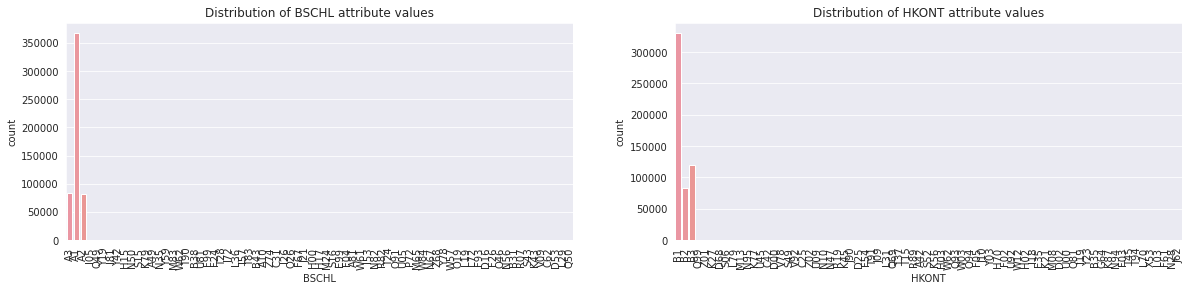

In [18]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=ori_dataset['BSCHL'], ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of BSCHL attribute values')

# plot the distribution of the general ledger account attribute
g = sns.countplot(x=ori_dataset['HKONT'], ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of HKONT attribute values')

Unfortunately, neural networks are in general not designed to be trained directly on categorical data and require the attributes to be trained on to be numeric. One simple way to meet this requirement is by applying a technique referred to as **"one-hot" encoding**. Using this encoding technique, we will derive a numerical representation of each of the categorical attribute values. One-hot encoding creates new binary columns for each categorical attribute value present in the original data.   
残念ながら、ニューラルネットワークは一般的にカテゴライズされたデータを直接学習するようには設計されておらず、学習の対象となる属性は数値である必要があります。この要求を満たす簡単な方法として、「ワンホット」エンコーディングと呼ばれる技術を適用することができます。このエンコーディング技術を用いて、カテゴリー属性の各値の数値表現を導き出します。「ワンホット」エンコーディングでは、元のデータに存在するカテゴリー属性値ごとに新しいバイナリ列を作成します。

Let's work through a brief example: The **categorical attribute “Receiver”** below contains the names "John", "Timur" and "Marco". We "one-hot" encode the names by creating a separate binary column for each possible name value observable in the "Receiver" column. Now, we encode for each transaction that contains the value "John" in the "Receiver" column this observation with 1.0 in the newly created "John" column and 0.0 in all other created name columns.  
簡単な例を見てみましょう。以下のcategorical属性「Receiver」には、「John」、「Timur」、「Marco」という名前が含まれています。「Receiver」列で観測可能な名前の値ごとに別のバイナリ列を作成して、名前を「ワンホット」エンコードします。ここで、「Receiver」列に「John」という値を含む各トランザクションについて、新たに作成した「John」列では1.0、その他の作成した名前列では0.0の観測値をエンコードします。

<img align="middle" style="max-width: 430px; height: auto" src="https://github.com/GitiHubi/deepAI/blob/master/images/encoding.png?raw=1">

Using this technique will "one-hot" encode the 6 categorical attributes in the original transactional dataset. This can be achieved using the `get_dummies()` function available in the Pandas data science library:    
この手法を用いることで、元のトランザクションデータセットに含まれる6つのカテゴリー属性を「ワンショット」でエンコードすることができます。これは、Pandasデータサイエンスライブラリにあるget_dummies()関数を使って実現できます。

In [19]:
# select categorical attributes to be "one-hot" encoded
categorical_attr_names = ['KTOSL', 'PRCTR', 'BSCHL', 'HKONT']

# encode categorical attributes into a binary one-hot encoded representation 
ori_dataset_categ_transformed = pd.get_dummies(ori_dataset[categorical_attr_names])

Finally, let's inspect the encoding of 10 sample transactions to see if we have been successfull.  
最後に、成功したかどうかを確認するために、10のサンプルトランザクションのエンコーディングを検査してみましょう。

In [20]:
# inspect encoded sample transactions
ori_dataset_categ_transformed.head(10)

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,KTOSL_C6,KTOSL_C7,KTOSL_C76,KTOSL_C8,KTOSL_C84,KTOSL_C9,KTOSL_D30,KTOSL_D51,KTOSL_D84,KTOSL_D89,KTOSL_E35,KTOSL_E40,KTOSL_F19,KTOSL_F45,KTOSL_G09,KTOSL_G19,KTOSL_G28,KTOSL_I08,KTOSL_I94,KTOSL_J33,KTOSL_J53,KTOSL_J67,KTOSL_J81,KTOSL_K00,KTOSL_K78,KTOSL_K80,KTOSL_K84,KTOSL_L07,KTOSL_L09,KTOSL_L17,...,HKONT_L03,HKONT_L31,HKONT_L70,HKONT_L79,HKONT_M08,HKONT_M13,HKONT_N10,HKONT_N28,HKONT_N47,HKONT_N94,HKONT_N95,HKONT_O94,HKONT_Q69,HKONT_Q81,HKONT_Q93,HKONT_Q99,HKONT_R19,HKONT_R89,HKONT_S06,HKONT_S49,HKONT_S52,HKONT_T15,HKONT_T37,HKONT_T45,HKONT_T91,HKONT_T94,HKONT_U00,HKONT_U09,HKONT_U45,HKONT_U92,HKONT_V78,HKONT_V92,HKONT_W03,HKONT_W12,HKONT_W62,HKONT_X53,HKONT_Y03,HKONT_Y23,HKONT_Z01,HKONT_Z02
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 Pre-Processing of Numerical Transaction Attributes

Let's now inspect the distributions of the two numerical attributes contained in the transactional dataset namely, the (1) local currency amount `DMBTR` and the (2) document currency amount `WRBTR`:  
ここで、トランザクションデータセットに含まれる2つの数値属性、すなわち、(1)現地通貨額DMBTRと(2)文書通貨額WRBTRの分布を見てみましょう。

Text(0.5, 1.0, 'Distribution of WRBTR amount values')

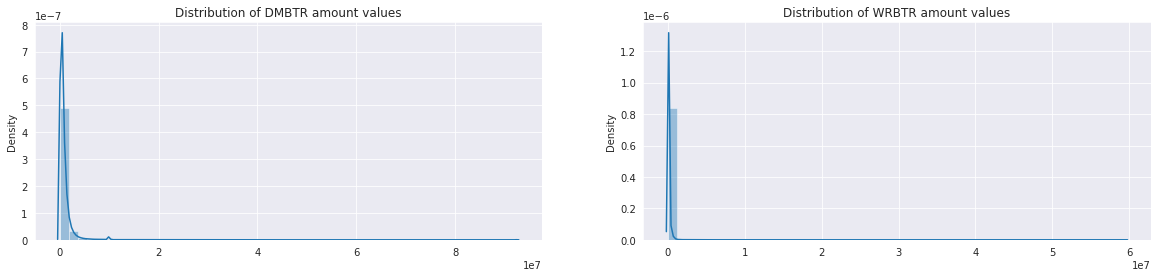

In [21]:
# plot the log-scaled "DMBTR" as well as the "WRBTR" attribute value distribution
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot distribution of the local amount attribute
g = sns.distplot(ori_dataset['DMBTR'].tolist(), ax=ax[0])
g.set_title('Distribution of DMBTR amount values')

# plot distribution of the document amount attribute
g = sns.distplot(ori_dataset['WRBTR'].tolist(), ax=ax[1])
g.set_title('Distribution of WRBTR amount values')

As expected, it can be observed, that for both attributes the distributions of amount values are heavy tailed. In order to approach faster a potential global minimum scaling and normalization of numerical input values is good a practice. Therefore, we first log-scale both variables and second min-max normalize the scaled amounts to the interval [0, 1].  
予想通り、両方の属性において、量の値の分布が重尾になっていることが観察できます。潜在的なグローバル・ミニマムに早く近づくためには、数値入力値のスケーリングと正規化を行うことが良い方法です。そこで、まず両方の変数を対数スケーリングし、次にスケーリングされた量を区間[0, 1]にmin-max正規化します。

In [22]:
# select "DMBTR"(現地通貨) vs. "WRBTR"(文書通貨) attribute
numeric_attr_names = ['DMBTR', 'WRBTR']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = ori_dataset[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
ori_dataset_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

Let's now visualize the log-scaled and min-max normalized distributions of both attributes:  
ここで、両属性の対数スケールおよび最小・最大規格化された分布を可視化してみましょう。

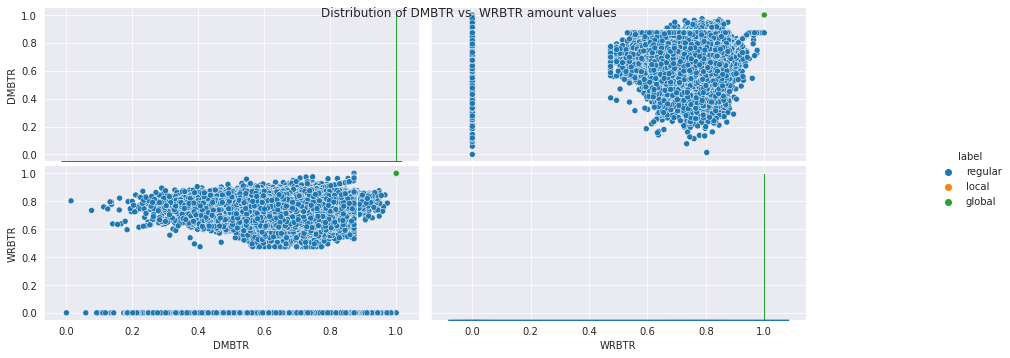

In [23]:
# append 'label' attribute for colour distinction
numeric_attr_vis = ori_dataset_numeric_attr.copy()
numeric_attr_vis['label'] = label

# plot the log-scaled and min-max normalized numeric attributes
g = sns.pairplot(data=numeric_attr_vis, vars=numeric_attr_names, hue='label')
g.fig.suptitle('Distribution of DMBTR vs. WRBTR amount values')
g.fig.set_size_inches(15, 5)

Ok, as anticipated the numeric attribute values of the "global" anomalies (green) fall outside the range of the regular amount distributions due to their unusual high amount values. In contrast, the numeric attribute values of the "local" anomalies (orange) are much more commingled within the regular transaction amounts.  
予想通り、「グローバル」異常(緑)の数値属性は、異常に高い金額であるため、通常の金額分布の範囲外となっています。一方、「ローカル」異常（オレンジ）の数値属性値は、通常の取引額の中に多く含まれています。

### 3.3 Merge Categorical and Numerical Transaction Attributes

Finally, we merge both pre-processed numerical and categorical attributes into a single dataset that we will use for training our deep autoencoder neural network (explained an implemented in the following section 4.):  
最後に、前処理された数値属性とカテゴリー属性の両方を1つのデータセットに統合し、ディープオートエンコーダー・ニューラルネットワークのトレーニングに使用します（次のセクション4.で説明、実装します）。

In [24]:
# merge categorical and numeric subsets
ori_subset_transformed = pd.concat([ori_dataset_categ_transformed, ori_dataset_numeric_attr], axis = 1)

Now, let's again have a look at the dimensionality of the dataset after we applied the distinct pre-processing steps to the attributes:  
さて、属性にそれぞれの前処理を適用した後のデータセットの次元をもう一度見てみましょう。

In [25]:
# inspect final dimensions of pre-processed transactional data
ori_subset_transformed.shape

(533009, 384)

### Exercises: 

Following the pre-processing steps above you may have noticed, that we didn't encode the attributes `WAERS`(通貨キー） and `BUKRS`（会社コード） yet. This we left as an exercise for you: 
上記の前処理の手順では、WAERSとBUKRSという属性をまだエンコードしていないことにお気づきでしょうか。これは練習問題として残しておきました。

>1. Plot and inspect the distribution of the values of both attributes `WAERS` and `BUKRS`. [3 min]  
両方の属性 `WAERS` と `BUKRS` の値の分布をプロットして調べてみましょう。[3分]  
>2. Encode both variables using the `get_dummies()` method provided by the Pandas library. [5 min]  
Pandasライブラリが提供する`get_dummies()`メソッドを使って、両方の変数をエンコードします。[5分]
>3. Merge your encoding results with the Pandas `ori_subset_transformed` data frame. [5 min]  
エンコード結果をPandasの`ori_subset_transformed`データフレームにマージします。[5分]

#####Exercises:1. Plot and inspect the distribution of the values of both attributes WAERS and BUKRS. [3 min]  
両方の属性 WAERS と BUKRS の値の分布をプロットして調べてみましょう。[3分]

Text(0.5, 1.0, 'Distribution of BUKRS attribute values')

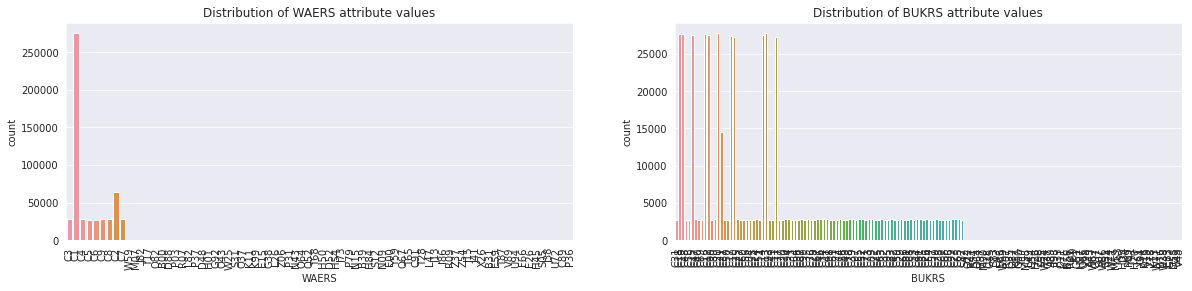

In [26]:
# prepare to plot currency key and company code side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)

# plot the distribution of the currency key attribute
# WAERS: the currency key,　通貨キー
g = sns.countplot(x=ori_dataset['WAERS'], ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of WAERS attribute values')

# plot the distribution of the company code attribute
# BUKRS: the company code, 会社コード の分布
g = sns.countplot(x=ori_dataset['BUKRS'], ax=ax[1])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of BUKRS attribute values')

#####Exercises:2. Encode both variables using the get_dummies() method provided by the Pandas library. [5 min]  
Pandasライブラリが提供するget_dummies()メソッドを使って、両方の変数をエンコードします。[5分]

In [27]:
# select categorical attributes to be "one-hot" encoded
categorical_attr_names = ['WAERS', 'BUKRS']

# encode categorical attributes into a binary one-hot encoded representation 
ori_dataset_categ_transformed = pd.get_dummies(ori_dataset[categorical_attr_names])

#####Exercises:3. Merge your encoding results with the Pandas ori_subset_transformed data frame. [5 min]  
エンコード結果をPandasのori_subset_transformedデータフレームにマージします。[5分]

In [28]:
# merge categorical and numeric subsets
ori_subset_transformed = pd.concat([ori_dataset_categ_transformed, ori_subset_transformed], axis = 1)

Ok, upon completion of all the pre-processing steps (incl. the exercises) we should end up with an encoded dataset consisting of a total number of 533,009 records (rows) and **618 encoded attributes** (columns). Let's keep the number number of columns in mind since it will define the dimensionality of the input- and output-layer of our deep autoencoder network which we will now implement in the following section.  
さて、すべての前処理（演習を含む）が完了すると、合計533,009レコード（行）と618のエンコードされた属性（列）からなるエンコードされたデータセットができあがります。列の数は、次のセクションで実装するディープオートエンコーダーネットワークの入力層と出力層の次元を定義することになるので、覚えておきましょう。

In [29]:
# inspect final dimensions of pre-processed transactional data
ori_subset_transformed.shape

(533009, 618)

## 4. Autoencoder Neural Networks (AENNs)

The objective of this section is to familiarize ourselves with the underlying idea and concepts of building a deep autoencoder neural network (AENN). We will cover the major building blocks and the specific network structure of AENNs as well as an exemplary implementation using the open source machine learning library PyTorch.  
このセクションの目的は、ディープオートエンコーダーニューラルネットワーク（AENN）を構築するための基本的なアイデアとコンセプトを理解することです。AENNの主要な構成要素と具体的なネットワーク構造を説明し、オープンソースの機械学習ライブラリPyTorchを使った例示的な実装を行います。

### 4.1 Autoencoder Neural Network Architecture

AENNs or "Replicator Neural Networks" are a variant of general feed-forward neural networks that have been initially introduced by Hinton and Salakhutdinov in [6]. AENNs usually comprise a **symmetrical network architecture** as well as a central hidden layer, referred to as **"latent"** or **"coding" layer**, of lower dimensionality. The design is chosen intentionally since the training objective of an AENN is to reconstruct its input in a "self-supervised" manner.   

AENNまたは "リプリケータ・ニューラルネットワーク "は、一般的なフィードフォワード・ニューラルネットワークの一種であり、HintonとSalakhutdinovが[6]で最初に紹介したものである。AENNは通常、**対称的なネットワーク・アーキテクチャ**と、**「潜在層」**または**「コーディング層」**と呼ばれる、低次元の中央隠れ層から構成されています。これは、AENNの学習目的が「自己教師付き」で入力を再構成することであるため、意図的に選択されたデザインである。

**Figure 3** below illustrates a schematic view of an autoencoder neural network:

**図3**は、オートエンコーダー・ニューラルネットワークの模式図である。

<img align="middle" style="max-width: 600px; height: auto" src="https://github.com/GitiHubi/deepAI/blob/master/images/autoencoder.png?raw=1">

**Figure 3:** Schematic view of an autoencoder network comprised of two non-linear mappings (fully connected feed forward neural networks) referred to as encoder $f_\theta: \mathbb{R}^{dx} \mapsto \mathbb{R}^{dz}$ and decoder $g_\theta: \mathbb{R}^{dz} \mapsto \mathbb{R}^{dx}$.

**図3：**2つの非線形マッピング(完全連結フィードフォワードニューラルネットワーク) エンコーダ$f_\theta: \mathbb{R}^{dx} \mapsto \mathbb{R}^{dz}$、デコーダ$g_\theta: \mathbb{R}^{dz} \mapsto \mathbb{R}^{dx}$で構成されるオートエンコーダネットワークの模式図です。


Furthermore, AENNs can be interpreted as "lossy" data **compression algorithms**. They are "lossy" in a sense that the reconstructed outputs will be degraded compared to the original inputs. The difference between the original input $x^i$ and its reconstruction $\hat{x}^i$ is referred to as **reconstruction error**. In general, AENNs encompass three major building blocks:

さらに、AENNは「損失型」のデータ圧縮アルゴリズムと解釈することができる。それらは、再構成された出力が元の入力に比べて劣化するという意味で「lossy」である。元の入力𝑥𝑖とその再構成𝑥̂ 𝑖の差は再構成誤差と呼ばれる。一般的に、AENNは3つの主要なビルディングブロックを包含している。

>   1. an encoding mapping function $f_\theta$,  
エンコーディングマッピング関数$f_\theta$
>   2. a decoding mapping function $g_\theta$,  
デコーディングマッピング関数 $g_\theta$
>   3. and a loss function $\mathcal{L_{\theta}}$.  
と、損失関数 $\mathcal{L_{\theta}}$ を用いて

Most commonly the encoder and the decoder mapping functions consist of **several layers of neurons followed by a non-linear function** and shared parameters $\theta$. The encoder mapping $f_\theta(\cdot)$ maps an input vector (e.g. an "one-hot" encoded transaction) $x^i$ to a compressed representation $z^i$ referred to as latent space $Z$. This hidden representation $z^i$ is then mapped back by the decoder $g_\theta(\cdot)$ to a re-constructed vector $\hat{x}^i$ of the original input space (e.g. the re-constructed encoded transaction). Formally, the nonlinear mappings of the encoder- and the decoder-function can be defined by:  
エンコーダとデコーダのマッピング機能は、数層のニューロンに非線形関数を加えたものが一般的であり、パラメータは共有されています。エンコーダマッピング$f_\theta(\cdot)$は、入力ベクトル（例えば、ワンショットで符号化されたトランザクション）$x^i$を、潜在空間$Z$と呼ばれる圧縮表現$z^i$にマッピングする。この隠れた表現$z^i$は、デコーダ$g_\theta(\cdot)$によって、元の入力空間の再構成されたベクトル$\hat{x}^i$（例えば、再構成されたコード化されたトランザクション）にマッピングされます。形式的には、エンコーダー機能とデコーダー機能の非線形マッピングは次のように定義できる。

<center>$f_\theta(x^i) = s(Wx^i + b)$, and $g_\theta(z^i) = s′(W′z^i + d)$,</center>

where $s$ and $s′$ denote non-linear activations with model parameters $\theta = \{W, b, W', d\}$, $W \in \mathbb{R}^{d_x \times d_z}, W' \in \mathbb{R}^{d_z \times d_y}$ are weight matrices and $b \in \mathbb{R}^{dx}$, $d \in \mathbb{R}^{dz}$ are offset bias vectors.

ここで、 $s$と $s′$ はモデルパラメータ𝜃を持つ非線形活性化を表す。$\theta = \{W, b, W', d\}$, $W \in \mathbb{R}^{d_x \times d_z}, W' \in \mathbb{R}^{d_z \times d_y}$ は重み行列、$b \in \mathbb{R}^{dx}$, $d \in \mathbb{R}^{dz}$はオフセットバイアスベクトルを表す。

### 4.2 Autoencoder Neural Network Implementation

Now, let's start implementing an AENN by first implementing the encoder network using PyTorch. For the encoder, we aim to implement a network consisting of **nine fully-connected layers**. Furthermore, the encoder is specified by the following number of neurons per layer: "618-256-128-64-32-16-8-4-3". Meaning the first layer consists of 618 neurons (specified by the dimensionality of our input data), the second layer of 256 neurons and the subsequent layers of 128, 64, 32, 16, 8, 4 and 3 neurons respectively.

それでは、AENNの実装を始めましょう。まず、PyTorchを使ってエンコーダネットワークを実装します。エンコーダには、**9つの完全連結層**からなるネットワークを実装することを目指します。さらに、エンコーダは、1層あたりのニューロン数を以下のように指定します。"618-256-128-64-32-16-8-4-3". つまり、第1層は入力データの次元数に応じた618個のニューロン、第2層は256個のニューロン、それ以降の層はそれぞれ128、64、32、16、8、4、3個のニューロンで構成されていることになります。

Some elements of the encoder network code below should be given particular attention:  

以下のエンコーダネットワークコードのいくつかの要素は、特に注意が必要です。


>- `self.encoder_Lx`: defines the linear transformation of the layer applied to the incoming input: $Wx + b$.  
<font color='blue'> self.encoder_Lx: 入力される𝑊𝑥+𝑏 適用されるレイヤーの線形変換を定義する</font>
>- `nn.init.xavier_uniform`: inits the layer weights using a uniform distribution according to [9]. <font color='blue'>nn.init.xavier_uniform：[9]に準拠した一様分布を使用してレイヤーの重みを設定します。</font>
>- `self.encoder_Rx`: defines the non-linear transformation of the layer: $\sigma(\cdot)$.  <font color='blue'>self.encoder_Rx: レイヤーの非線形変換𝜎(・) を定義します。</font>
>- `self.dropout`: randomly zeros some of the elements of the input tensor with probability $p$ according to [8].  
<font color='blue'>self.dropout: 入力テンソルの要素の一部を[8]に従って確率𝑝で、ランダムにゼロにする。</font>

We use **"Leaky ReLUs"** as introduced by Xu et al. in [7] to avoid "dying" non-linearities and to speed up training convergence. Leaky ReLUs allow a small gradient even when a particular neuron is not active. In addition, we include the **"drop-out" probability**, as introduced by [8], which defines the probability rate for each neuron to be set to zero at a forward pass to prevent the network from overfitting. However we explore its effect on the model later in the exercise section of the lab. Initially, we set the dropout probability of each neuron to $p=0.0$ (0%), meaning that none of the neuron activiations will be set to zero.  

Xuらが[7]で紹介した**"Leaky ReLUs "**を用いることで、"dying "非線形性を回避し、学習の収束を早めることができます。Leaky ReLUは、特定のニューロンが活動していない場合でも、小さな勾配を可能にします。さらに、[8]で紹介されている**"drop-out "probability**を入れています。これは、ネットワークのオーバーフィッティングを防ぐために、フォワードパスで各ニューロンがゼロになる確率を定義しています。これは、ネットワークのオーバーフィッティングを防ぐために、各ニューロンの確率を順方向にゼロに設定するものです。最初は、各ニューロンのドロップアウト確率を $p=0.0$ (0%) に設定し、どのニューロンの活性化もゼロにならないようにします。

In [30]:
# PyTorch　→　Keras
# implementation of the encoder network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Activation, Dropout, LeakyReLU

encorder = keras.models.Sequential()

encorder.add(keras.layers.Dense(512, use_bias=True, kernel_initializer='glorot_normal',input_shape=(ori_subset_transformed.shape[1], )))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))

encorder.add(keras.layers.Dense(256, use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(128, use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(64,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(32,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(16,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(8,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(4,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))
encorder.add(keras.layers.Dense(3,  use_bias=True, kernel_initializer='glorot_normal'))
encorder.add(keras.layers.LeakyReLU(alpha=0.4))
encorder.add(keras.layers.Dropout(0.0, ))

encorder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               316928    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [31]:
# PyTorch　→　Keras
# implementation of the decoder network

decorder = keras.models.Sequential()

decorder.add(keras.layers.Dense(4, use_bias=True, kernel_initializer='glorot_normal',input_shape=(3, )))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(8, use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(16, use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(32,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(64,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(128,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(256,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(512,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.add(keras.layers.Dense(618,  use_bias=True, kernel_initializer='glorot_normal'))
decorder.add(keras.layers.LeakyReLU(alpha=0.4))
decorder.add(keras.layers.Dropout(0.0, ))

decorder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 16        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 4)                 0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8)                 0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)               

In [32]:
autoencorder = keras.models.Sequential([encorder,decorder])

In [33]:
# define the optimization criterion / loss function

from tensorflow.keras import losses
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# define learning rate and optimization strategy
learning_rate = 1e-3

import tensorflow as tf
from tensorflow.keras import optimizers
optimizer = tf.keras.optimizers.Adam(learning_rate =learning_rate)

autoencorder.compile(loss=loss_function, optimizer=optimizer)

In [ ]:
history = autoencorder.fit(ori_subset_transformed,ori_subset_transformed,batch_size=128,epochs=10,verbose=1,shuffle=True,validation_split=0.2)

In [36]:
print(pd.DataFrame(history.history))

       loss  val_loss
0  0.022807  0.009688
1  0.008072  0.006553
2  0.006529  0.007362
3  0.005986  0.005267
4  0.004851  0.003991


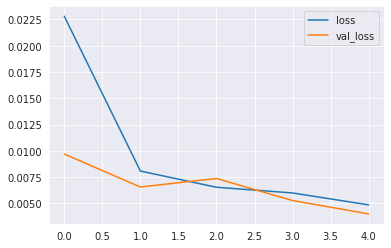

In [40]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

Text(0.5, 1.0, 'AENN training performance')

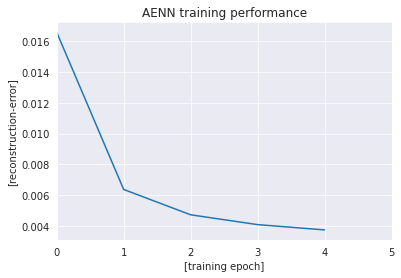

In [ ]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

#<font color = 'red'>↑ここから前を実行する</font>

In [29]:
# PyTorch
# implementation of the encoder network
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 618, out 512
        self.encoder_L1 = nn.Linear(in_features=ori_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

IndentationError: ignored

Now, we are ready to instantiate the encoder model to be trained on the CPU or to be trained on any of the available GPUs (if CUDNN is available and `USE_CUDA` is set to `True`) by execution of the following cell:  

これで、次のセルを実行することで、エンコーダモデルをインスタンス化して、CPUで学習させるか、利用可能なGPUで学習させることができます（CUDNNが利用可能で、`USE_CUDA`が`True`に設定されている場合）。

In [ ]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    #encoder_train = encoder().cuda()

Once the model is initialized we can visualize the model structure and review the implemented network architecture by execution of the following cell:

モデルが初期化されると、以下のセルを実行することで、モデルの構造を可視化し、実装されたネットワーク・アーキテクチャを確認することができます。

In [ ]:
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

Looks, great? Excellent!  
見て！、素晴らしい？Excellent!

Let's, now as a next step, complete the AENN by implementing the corresponding decoder network. The decoder also consists of nine fully-connected layers. Futhermore, the decoder network is intended to **symmetrically mirror** the encoder networks architecture by a layer wise inversion "3-4-8-16-32-64-128-256-618" of the encoder network layers.  

さて、次のステップとして、対応するデコーダネットワークを実装することで、AENNを完成させましょう。デコーダもまた、完全に接続された9つの層から構成されている。さらに、デコーダーネットワークは、エンコーダーネットワークのレイヤーを「3-4-8-16-32-64-128-256-618」と反転させることで、エンコーダーネットワークのアーキテクチャを**対称的に**反映させることを目的としている。

In [ ]:
# implementation of the decoder network
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=ori_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

Let's also instantiate the encoder model for CPU or GPU training and convince ourselves that it was successfully initialized by printing and reviewing its architecture by execution of the following cell:  

また、CPUやGPUのトレーニング用にエンコーダモデルをインスタンス化し、印刷によって初期化に成功したことを確認し、次のセルの実行によってアーキテクチャを確認してみましょう。

In [ ]:
# init training network classes / architectures
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

Looks like intended? Brilliant!

意図したように？お見事です。

### 4.3 Autoencoder Neural Network Training

Now that we have implemented the AENN we are ready to train the network. Prior to starting the training, we need to define an apropriate loss function. Remember, we aim to train our model to learn a set of encoder-decoder model parameters $\theta$ that minimize the dissimilarity of a given financial transaction $x^{i}$ and its reconstruction $\hat{x}^{i} = g_\theta(f_\theta(x^{i}))$ as faithfully as possible.　　

AENNの実装が完了したので、ネットワークをトレーニングする準備ができました。学習を開始する前に、適切な損失関数を定義する必要があります。ここでは、与えられた財務取引$x^{i}$とその再構築物$\hat{x}^{i} = g_\theta(f_\theta(x^{i}))$の非類似性をできるだけ忠実に最小化するエンコーダ・デコーダモデルパラメータ$\theta$を学習するようにモデルを学習することを目的としています。

Thereby, the training objective is to learn a set of optimal shared encoder-decoder model parameters $\theta^*$ that optimize $\arg\min_{\theta} \|X - g_\theta(f_\theta(X))\|$ over all transactions or more specifically journal entries $X$. To achieve this optimization objective, one typically minimizes a loss function $\mathcal{L_{\theta}}$ as part of the network training. In this lab we use the **binary-cross-entropy error (BCE)** loss, defined by:　　

トレーニングの目的は、全てのトランザクション、より具体的にはジャーナルエントリ𝑋に関する$\arg\min_{\theta} \|X - g_\theta(f_\theta(X))\|$を最適化する、最適な共有エンコーダ-デコーダモデルパラメータのセット$\mathcal{L_{\theta}}$を学習することである。この最適化目的を達成するために、ネットワークの学習の一部として損失関数𝜃を最小化するのが一般的である。本研究室では、次のように定義されるバイナリークロスエントロピーエラー（BCE）損失を用いる。

<center> $\mathcal{L^{BCE}_{\theta}}(x^{i};\hat{x}^{i}) = \frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{k} x^{i}_{j} ln(\hat{x}^{i}_{j}) + (1-x^{i}_{j}) ln(1-\hat{x}^{i}_{j})$, </center>

for a set of $n$-journal entries $x^{i}$, $i=1,...,n$ and their respective reconstructions $\hat{x}^{i}$ and all journal entry attributes $j=1,...,k$. During trainig the BCE loss will penalize models that result in a high dissimilarity between input journal entries and their respective reconstructions.   

$n$個のジャーナルエントリ$x^{i}$, $i=1,...,n$とそれらの再構成$\hat{x}^{i}$、およびすべてのジャーナルエントリ属性$j=1,...,k$のセットに対して、BCE損失を計算します。BCE損失は、入力されたジャーナルエントリとそれぞれの再構成の間に高い非類似度をもたらすモデルにペナルティを与えます。

Luckily, an implementation of the BCE loss is already available in PyTorch! It can be instantiated "off-the-shelf" via execution of the following PyTorch command:  

幸運なことに、BCE損失の実装はすでにPyTorchで利用可能です。以下のPyTorchコマンドを実行することで、「すぐに」インスタンス化することができます。

In [31]:
# define the optimization criterion / loss function
#loss_function = nn.BCEWithLogitsLoss(reduction='mean')

from tensorflow.keras import losses
loss_function = tf.keras.losses.Binary.Crossentropy(from_logits=True, reduction='mean')

AttributeError: ignored

(Note: Enabling the parameter `reduction` specifies that the losses are averaged over all observations for each minibatch).  
注：パラメータ「reduction」を有効にすると、各ミニバッチのすべての観測値に対して損失が平均化されるようになります）。

Based on the loss magnitude of a certain mini-batch PyTorch automatically computes the gradients. But even better, based on the gradient, the library also helps us in the optimization and update of the AENN parameters $\theta$.

あるミニバッチの損失の大きさ$\theta$に基づいて、PyTorchは自動的にグラジエントを計算する。しかし、さらに良いことに、勾配に基づいて、ライブラリはAENNパラメータ𝜃の最適化と更新にも役立ちます。


We will use the **Adam optimization** as proposed in [11] and set the learning-rate $l = 0.001$. Each mini-batch step the optimizer will update the encoder- and decoder-parameters $\theta$ values according to degree of reconstruction error. 

ここでは，[11]で提案されている**Adam最適化**を用い，学習率$l=0.001$を設定します．ミニバッチステップごとに、最適化器は再構成誤差の度合いに応じて、エンコーダパラメータとデコーダパラメータの$\theta$値を更新します。

In [ ]:
# define learning rate and optimization strategy
learning_rate = 1e-3
#encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
#decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

import tensorflow as tf
from tensorflow.keras import optimizers
optimizer = tf.keras.optimizers.Adam(learning_rate ='learning_rate')

Now that we have successfully implemented and defined the three AENN building blocks let's take some time to review the `encoder` and `decoder` model definition as well as the `loss`. Please, read the above code and comments carefully and don't hesitate to let us know any questions you might have.

さて、AENNの3つのビルディングブロックの実装と定義が完了したところで、「エンコーダー」と「デコーダー」のモデル定義、および「損失」について、少し時間をかけて確認してみましょう。上記のコードとコメントをよくお読みになり、ご不明な点がありましたら、遠慮なくお問い合わせください。

## 5. Training the Autoencoder Neural Network (AENN) Model

In this section, we will train our deep autoencoder neural network (as implemented in section 4. of the lab) using the encoded transactional data (created in section 3. of the lab). More specifically, we will have a detailed look into the distinct training steps as well as how to monitor the training progress.

このセクションでは、エンコードされたトランザクションデータ（ラボのセクション3で作成）を使用して、ディープオートエンコーダーニューラルネットワーク（ラボのセクション4で実装）をトレーニングします。具体的には、トレーニングの各ステップと、トレーニングの進捗を監視する方法について詳しく見ていきます。

### 5.1 Preparing the Network Training

We have pre-processed the dataset, implemented the AENN and defined the reconstruction error. Let's now start to train a corresponding model for **5 epochs** and a **mini-batch size of 128** journal entries per batch. This implies that the whole dataset will be fed to the AENN 5 times in chunks of 128 journal entries yielding to 4,165 mini-batches (533,009 journal entries / 128 journal entries per mini-batch) per epoch.

データセットを前処理し、AENNを実装し、再構成誤差を定義しました。ここでは、**5回のエポック**と、**バッチあたり128**個のジャーナル・エントリという**ミニ・バッチ・サイズに対応するモデルの学習を始めましょう。これは、データセット全体が128個のジャーナルエントリの塊で5回AENNに供給され、1エポックあたり4,165個のミニバッチ（533,009個のジャーナルエントリ / ミニバッチあたり128個のジャーナルエントリ）が得られることを意味します。

In [ ]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

During the training phase, we will fetch the individual mini-batches of the entire population of journal entries. To achieve this, we will use PyTorch's `DataLoader` that provides single- or multi-process iterators over a given dataset to load one mini-batch at a time. By enabling `shuffle=True` the data will be reshuffled at every epoch prior to feeding it to the network. 

学習段階では、ジャーナルエントリの全集団から個々のミニバッチを取得します。これを実現するために、PyTorchの`DataLoader`を使用します。このDataLoaderは、与えられたデータセットに対してシングルまたはマルチプロセスのイテレータを提供し、一度に1つのミニバッチをロードします。shuffle=True`を有効にすると、データはエポック毎に再シャッフルされてからネットワークに投入されます。

In [ ]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(ori_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

### 5.2 Running the Network Training

Finally, we start training the model. The training procedure of each mini-batch is performed as follows: 

最後に、モデルのトレーニングを開始します。各ミニバッチの学習手順は以下のように行われます。

>1. do a forward pass through the encoder-decoder part,   
エンコーダ・デコーダ部をフォワードパスする。
>2. compute the binary-cross-entropy reconstruction loss $\mathcal{L^{BCE}_{\theta}}(x^{i};\hat{x}^{i})$,   
バイナリー・クロス・エントロピー再構築損失$\mathcal{L^{BCE}_{\theta}}(x^{i};\hat{x}^{i})$を計算する。
>3. do a backward pass through the encoder-decoder part, and   
エンコーダ・デコーダ部をバックワードパスする。そして、
>4. update the parameters of the encoder $f_\theta(\cdot)$ and decoder $g_\theta(\cdot)$ networks.  
エンコーダ$f_\theta(\cdot)$とデコーダ$g_\theta(\cdot)$ネットワークのパラメータを更新する。

To ensure learning while training our AENN model we will monitor whether the loss decreases with progressing training. Therefore, we obtain and evaluate the reconstruction performance of the entire dataset after each training epoch. Based on this evaluation we can conclude on the training progress and whether the loss is converging (indicating that the model might not improve any further).

AENNモデルの学習を確実なものにするために、学習の進行に伴って損失が減少するかどうかを監視します。そのため、各トレーニングエポックの後に、データセット全体の再構成性能を取得し、評価します。この評価に基づいて、学習の進捗状況と、損失が収束しているかどうか（モデルがこれ以上改善されない可能性があることを示す）を結論付けることができます。

The following elements of the network training code below should be given particular attention:

以下のネットワークトレーニングコードの要素には、特に注意が必要です。
 
>- `reconstruction_loss.backward()` computes the gradients based on the magnitude of the reconstruction loss,  
<font color='blue'>`reconstruction_loss.backward()` は，再構築損失の大きさに基づいてグラデーションを計算します．</font>
>- `encoder_optimizer.step()` and `decoder_optimizer.step()` updates the network parameters based on the gradient.  
<font color='blue'>encoder_optimizer.step()とdecoder_optimizer.step()は、勾配に基づいてネットワークのパラメータを更新します。</font>

Please also note, that the mini-batch training of the AENN will be executed on the GPU (if CUDNN is available and set accordingly by USE_CUDA=True). However, the evaluation of the reconstruction performance over the entire set of journal entries will be performed at CPU level. Using PyTorch this can be easily achieved with the following commands:

なお、AENNのミニバッチトレーニングはGPUで実行されます（CUDNNが利用可能で、USE_CUDA=Trueで適宜設定されている場合）。しかし、ジャーナルエントリのセット全体に対する再構成パフォーマンスの評価は、CPUレベルで実行されます。PyTorchを使えば、以下のコマンドで簡単に実現できます。

>- `encoder_train.cuda()`: moves all model parameters and buffers to the GPU. 
<font color='blue'>encoder_train.cuda()`: すべてのモデルパラメータとバッファをGPUに移動します。</font>
>- `encoder_train.cpu()`: moves all model parameters and buffers to the CPU.  
<font color='blue'>`encoder_train.cpu()`: すべてのモデルパラメータとバッファをCPUに移動します。</font>

The reason for the switch to the CPU in the evaluation phase is the size of the entire dataset. We aim to compute the reconstruction error over the entire dataset, which in most of the cases does not fit into the GPU's memory.

評価段階でCPUに切り替えた理由は，データセット全体の大きさにあります．我々はデータセット全体の再構成誤差を計算することを目的としていますが、ほとんどの場合、GPUのメモリには収まりません。

In addition, after each training epoch we want to save a checkpoint for both the actual `encoder` and `decoder` model. The saved model checkpoints contain a snapshot of the trained model parameter values upon completion of a training epoch. In general, it is good practice, to save checkpoints at regular intervals during training. In case your system crashes during training you are able continue from the last checkpoint rather than start over from scratch.

さらに，トレーニングエポックごとに，実際の「エンコーダー」と「デコーダー」の両方のモデルのチェックポイントを保存したいと考えています．保存されたモデルのチェックポイントには，トレーニングエポックが完了したときの，トレーニングされたモデルのパラメータ値のスナップショットが含まれています．一般的には，トレーニング中に一定の間隔でチェックポイントを保存するのが良い方法です．万が一，トレーニング中にシステムがクラッシュしても，最初からやり直すのではなく，最後のチェックポイントから続けることができます．

>- `torch.save()`: saves a checkpoint of the actual encoder and decoder model parameter values to disc.  
<font color='blue'>:torch.save()`: 実際のエンコーダとデコーダのモデルパラメータ値のチェックポイントをディスクに保存します。</font>

In [ ]:
# init collection of epoch losses
epoch_losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    torch.save(encoder_train.state_dict(), encoder_model_name)

    # save trained decoder model file to disk
    decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    torch.save(decoder_train.state_dict(), decoder_model_name)

[LOG 20210501-02:20:06] training status, epoch: [0001/0005], batch: 1000, loss: 0.0132, mode: CPU, time required: 0:00:20.300621
[LOG 20210501-02:20:29] training status, epoch: [0001/0005], batch: 2000, loss: 0.0071, mode: CPU, time required: 0:00:23.386049
[LOG 20210501-02:20:56] training status, epoch: [0001/0005], batch: 3000, loss: 0.0062, mode: CPU, time required: 0:00:26.600349
[LOG 20210501-02:21:26] training status, epoch: [0001/0005], batch: 4000, loss: 0.0045, mode: CPU, time required: 0:00:30.136291
[LOG 20210501-02:21:31] training status, epoch: [0001/0005], loss: 0.0122222809


KeyboardInterrupt: ignored

Let's now evaluate if the loss function is indeed going down with progressing training of the model. Therefore, let's visualize the magnitudes of the losses obtained per training epoch:

ここで、モデルの学習が進むにつれて、損失関数が本当に下がっているかどうかを評価してみましょう。そこで、学習エポックごとに得られる損失の大きさを可視化してみましょう。

Text(0.5, 1.0, 'AENN training performance')

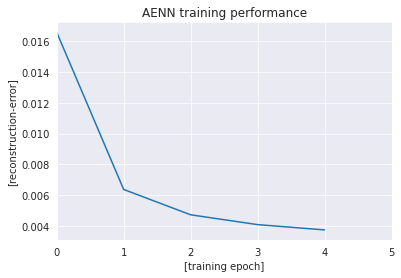

In [ ]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

How does the reconstruction loss change as we progress in training our model? After 5 epochs, we can observe that our reconstruction loss already went down significantly and starts to converge nicely. This indicates that our network did a pretty good job in learning the structure and attributes of the journal entries.

モデルの学習が進むにつれて、再構成損失はどのように変化するでしょうか。5エポック後、再構築損失はすでに大幅に減少し、きれいに収束し始めていることがわかります。これは、ネットワークがジャーナルの構造と属性をうまく学習したことを示しています。

But, from the plot we also observe that the model could probably be trained a couple more epochs as the trend of the reconstruction error still decreases for the last few epochs. In order to save time, we will continue the lab using a pre-trained model already trained by 20 epochs.

しかし、このプロットから、最後の数エポックで再構成誤差の傾向がまだ減少していることから、モデルをさらに2、3エポック学習できる可能性があることもわかりました。時間を節約するために、20エポックで既に訓練された事前訓練モデルを使って実験を続けます。

### Exercises:

Before we continue with the next notebook section it's time for some exercises:

次のノートブックセクションに進む前に、いくつかの演習を行います。


>1. Set the `USE_CUDA` flag to `False` and re-start the training procedure. What impact do you observe in terms of training time needed for training a single epoch? Please, note that after altering the `USE_CUDA` flag you need to execute all successive cells starting from section 4.2. [5-10 min]  
<font color='blue'>USE_CUDA "フラグを "False "に設定して、トレーニングを再開します。1つのエポックを学習するのに必要な学習時間について、どのような影響があるでしょうか？なお、`USE_CUDA`フラグを変更した後は、セクション4.2以降の連続したセルをすべて実行する必要があります。[5-10分].　</font>
>2. Set the `dropout` probability to `0.8` (80%) and re-start the training procedure. What impact do you observe in terms of training performance / reconstruction loss? Please, note that after altering the `dropout` probability you need to execute all successive cells starting from section 4.2. [5-10 min]  
<font color='blue'>ドロップアウト」の確率を「0.8」（80％）に設定して、トレーニングを再開します。トレーニングのパフォーマンスや再構築の損失について、どのような影響があるでしょうか？なお、「ドロップアウト」の確率を変更した後は、セクション4.2から始まる連続したセルをすべて実行する必要があります。[5-10分].</font>

###<font color='orange'>GPUを使用したトレーニング USE_CUDA = False</font>
**1. Set the `USE_CUDA` flag to `False` and re-start the training procedure. What impact do you observe in terms of training time needed for training a single epoch? Please, note that after altering the `USE_CUDA` flag you need to execute all successive cells starting from section 4.2. [5-10 min]**

<font color='blue'>USE_CUDA "フラグを "False "に設定して、トレーニングを再開します。1つのエポックを学習するのに必要な学習時間について、どのような影響があるでしょうか？なお、`USE_CUDA`フラグを変更した後は、セクション4.2以降の連続したセルをすべて実行する必要があります。[5-10分].　</font>

In [ ]:
USE_CUDA = False

In [ ]:
# implementation of the encoder network
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 618, out 512
        self.encoder_L1 = nn.Linear(in_features=ori_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [ ]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()

In [ ]:
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

[LOG 20210501-01:31:18] encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=618, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L8): Linear(in_features=8, out_feature

In [ ]:
# implementation of the decoder network
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=ori_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

In [ ]:
# init training network classes / architectures
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

[LOG 20210501-01:31:18] decoder architecture:

decoder(
  (decoder_L1): Linear(in_features=3, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=32, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L5): Linear(in_features=32, out_features=64, bias=True)
  (decoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L6): Linear(in_features=64, out_features=128, bias=True)
  (decoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L7): Linear(in_features=128, out_features=256, bias=True)
  (decoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L8): Linear(in_features=256, out_features=512,

In [ ]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')

In [ ]:
# define learning rate and optimization strategy
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [ ]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

In [ ]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(ori_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

In [ ]:
# init collection of epoch losses
epoch_losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == False) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    torch.save(encoder_train.state_dict(), encoder_model_name)

    # save trained decoder model file to disk
    decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    torch.save(decoder_train.state_dict(), decoder_model_name)

[LOG 20210501-01:31:49] training status, epoch: [0001/0005], batch: 1000, loss: 0.0178, mode: GPU, time required: 0:00:29.042858
[LOG 20210501-01:32:21] training status, epoch: [0001/0005], batch: 2000, loss: 0.0121, mode: GPU, time required: 0:00:32.220857
[LOG 20210501-01:32:56] training status, epoch: [0001/0005], batch: 3000, loss: 0.0086, mode: GPU, time required: 0:00:35.198645
[LOG 20210501-01:33:34] training status, epoch: [0001/0005], batch: 4000, loss: 0.0068, mode: GPU, time required: 0:00:37.684586
[LOG 20210501-01:33:40] training status, epoch: [0001/0005], loss: 0.0159062665
[LOG 20210501-01:34:18] training status, epoch: [0002/0005], batch: 1000, loss: 0.0069, mode: GPU, time required: 0:00:37.729061
[LOG 20210501-01:34:56] training status, epoch: [0002/0005], batch: 2000, loss: 0.0065, mode: GPU, time required: 0:00:38.119858
[LOG 20210501-01:35:34] training status, epoch: [0002/0005], batch: 3000, loss: 0.0057, mode: GPU, time required: 0:00:38.104347
[LOG 20210501-01:

Text(0.5, 1.0, 'AENN training performance')

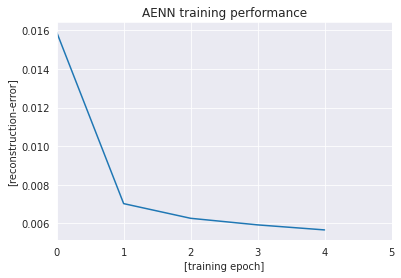

In [ ]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

##<font color='orange'>dropout 0.8の場合</font>#
**2. Set the `dropout` probability to `0.8` (80%) and re-start the training procedure. What impact do you observe in terms of training performance / reconstruction loss? Please, note that after altering the `dropout` probability you need to execute all successive cells starting from section 4.2. [5-10 min]**  
<font color='blue'>ドロップアウト」の確率を「0.8」（80％）に設定して、トレーニングを再開します。トレーニングのパフォーマンスや再構築の損失について、どのような影響があるでしょうか？なお、「ドロップアウト」の確率を変更した後は、セクション4.2から始まる連続したセルをすべて実行する必要があります。[5-10分].</font>

In [ ]:
USE_CUDA = False

In [ ]:
# implementation of the encoder network
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 618, out 512
        self.encoder_L1 = nn.Linear(in_features=ori_subset_transformed.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, 256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, 128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.8, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [ ]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()

In [ ]:
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

[LOG 20210501-02:22:56] encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=384, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L8): Linear(in_features=8, out_feature

In [ ]:
# implementation of the decoder network
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 618
        self.decoder_L9 = nn.Linear(in_features=512, out_features=ori_subset_transformed.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.8, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

In [ ]:
# init training network classes / architectures
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

[LOG 20210501-02:22:56] decoder architecture:

decoder(
  (decoder_L1): Linear(in_features=3, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=32, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L5): Linear(in_features=32, out_features=64, bias=True)
  (decoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L6): Linear(in_features=64, out_features=128, bias=True)
  (decoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L7): Linear(in_features=128, out_features=256, bias=True)
  (decoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L8): Linear(in_features=256, out_features=512,

In [ ]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')

In [ ]:
# define learning rate and optimization strategy
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [ ]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

In [ ]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(ori_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)

In [ ]:
# init collection of epoch losses
epoch_losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == False) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])

    # =================== evaluate model performance =============================
                                 
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses)))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    torch.save(encoder_train.state_dict(), encoder_model_name)

    # save trained decoder model file to disk
    decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    torch.save(decoder_train.state_dict(), decoder_model_name)

[LOG 20210501-02:23:19] training status, epoch: [0001/0005], batch: 1000, loss: 0.1137, mode: GPU, time required: 0:00:22.944405
[LOG 20210501-02:23:42] training status, epoch: [0001/0005], batch: 2000, loss: 0.0387, mode: GPU, time required: 0:00:22.367273
[LOG 20210501-02:24:04] training status, epoch: [0001/0005], batch: 3000, loss: 0.0353, mode: GPU, time required: 0:00:22.236203
[LOG 20210501-02:24:26] training status, epoch: [0001/0005], batch: 4000, loss: 0.0347, mode: GPU, time required: 0:00:21.853056
[LOG 20210501-02:24:30] training status, epoch: [0001/0005], loss: 0.1682312845
[LOG 20210501-02:24:52] training status, epoch: [0002/0005], batch: 1000, loss: 0.0327, mode: GPU, time required: 0:00:22.239413
[LOG 20210501-02:25:14] training status, epoch: [0002/0005], batch: 2000, loss: 0.033, mode: GPU, time required: 0:00:22.193632
[LOG 20210501-02:25:36] training status, epoch: [0002/0005], batch: 3000, loss: 0.0336, mode: GPU, time required: 0:00:22.224979
[LOG 20210501-02:2

Text(0.5, 1.0, 'AENN training performance')

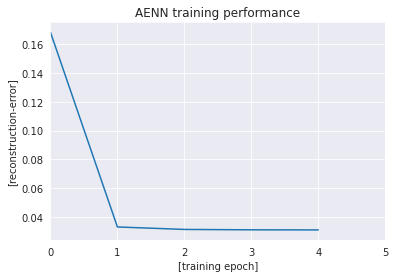

In [ ]:
# plot the training progress
plt.plot(range(0, len(epoch_losses)), epoch_losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

## 6. Evaluating the Autoencoder Neural Network (AENN) Model

Now that we know how to train our autoencoder model, we will explore how we can use it to detect anomalies within the entire population of journal entries. Initially, we will start by loading a pre-trained model of 10 epochs and assess its reconstruction capability on the entire dataset.

オートエンコーダーモデルの学習方法がわかったところで、このモデルを使って、ジャーナルエントリの母集団全体から異常を検出する方法を探ってみましょう。まず、事前に学習した10エポックのモデルをロードし、データセット全体での再構築能力を評価します。

The pre-trained model is stored in the same directory as the lab notebook and can be loaded by executing the cell below: 

事前に学習されたモデルは、ラボノートブックと同じディレクトリに保存されており、以下のセルを実行することで読み込むことができます。

In [ ]:
# restore pretrained model checkpoint
encoder_model_name = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/models/ep_10_encoder_model.pth'
decoder_model_name = 'https://raw.githubusercontent.com/GitiHubi/deepAI/master/models/ep_10_decoder_model.pth'

# Read stored model from the remote location
encoder_bytes = urllib.request.urlopen(encoder_model_name)
decoder_bytes = urllib.request.urlopen(decoder_model_name)

# Load tensor from io.BytesIO object
encoder_buffer = io.BytesIO(encoder_bytes.read())
decoder_buffer = io.BytesIO(decoder_bytes.read())

# init training network classes / architectures
encoder_eval = encoder()
decoder_eval = decoder()

# load trained models
encoder_eval.load_state_dict(torch.load(encoder_buffer))
decoder_eval.load_state_dict(torch.load(decoder_buffer))

<All keys matched successfully>

### 6.1 Assessment of the Pre-Trained Model

Once obtained, let's use the model to reconstruct the entire dataset:

得られたモデルを使って、データセット全体を再構築してみましょう。

In [ ]:
# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# set networks in evaluation mode (don't apply dropout)
encoder_eval.eval()
decoder_eval.eval()

# reconstruct encoded transactional data
reconstruction = decoder_eval(encoder_eval(data))

Ok, nice. Comparing the overall reconstruction loss of the pre-trained model trained for **10 epochs** to the one we initially trained for **5 epochs** reveals, that the pre-trained model results in a significantly lower reconstruction error. We can therefore conclude that the pre-trained model outperforms our initial model in capturing the inherent characteristics of the journal entries.

いいですね。10エポック**で学習した事前学習済みモデルと、5エポック**で学習した初期モデルの全体的な再構築損失を比較すると、事前学習済みモデルの方が再構築誤差が大幅に少ないことがわかります。したがって，ジャーナルエントリの固有の特性を捕捉する上で，事前学習モデルは初期モデルよりも優れていると結論づけることができます。

### 6.2 Assessment of the Individual Transactions

Ok, now that we are convinced that the pre-trained model is of decent quality let's assess the individual journal entries of the dataset. To achieve this, we collect the reconstruction errors of each individual journal entry by executing the cell below:

さて、事前に学習されたモデルが適切な品質であることが確認できたので、データセットの個々のジャーナルエントリを評価してみましょう。そのためには、以下のセルを実行して、個々のジャーナルエントリの再構築エラーを収集します。

In [ ]:
# init binary cross entropy errors
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 100000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))
        

[LOG 20210501-02:33:26] collected individual reconstruction loss of: 000000/533009 transactions
[LOG 20210501-02:33:33] collected individual reconstruction loss of: 100000/533009 transactions
[LOG 20210501-02:33:39] collected individual reconstruction loss of: 200000/533009 transactions
[LOG 20210501-02:33:45] collected individual reconstruction loss of: 300000/533009 transactions
[LOG 20210501-02:33:51] collected individual reconstruction loss of: 400000/533009 transactions
[LOG 20210501-02:33:58] collected individual reconstruction loss of: 500000/533009 transactions


Once we have collected individual reconstruction errors let's visualize them accordingly:

個々の再構成誤差を収集したら、それを可視化してみましょう。

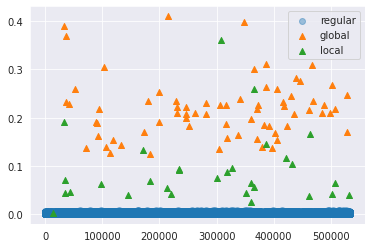

In [ ]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# assign unique id to transactions
plot_data = np.column_stack((np.arange(len(reconstruction_loss_transaction)), reconstruction_loss_transaction))

# obtain regular transactions as well as global and local anomalies
regular_data = plot_data[label == 'regular']
global_outliers = plot_data[label == 'global']
local_outliers = plot_data[label == 'local']

# plot reconstruction error scatter plot
ax.scatter(regular_data[:, 0], regular_data[:, 1], c='C0', alpha=0.4, marker="o", label='regular') # plot regular transactions
ax.scatter(global_outliers[:, 0], global_outliers[:, 1], c='C1', marker="^", label='global') # plot global outliers
ax.scatter(local_outliers[:, 0], local_outliers[:, 1], c='C2', marker="^", label='local') # plot local outliers

# add plot legend of transaction classes
ax.legend(loc='best')

The visualization reveals that the pre-trained model is able to reconstruct the majority of regular journal entries, while failing to do so, for the anomalous ones. As a result, the model reconstruction error can be used to distinguish both "global" anomalies (orange) and "local" anomalies (green) from the regular journal entries (blue).

事前に学習させたモデルは、通常の仕訳の大部分を再構成することができますが、異常な仕訳については再構成できないことがわかります。その結果、モデルの再構築エラーを利用して、「グローバル」な異常（オレンジ）と「ローカル」な異常（緑）を通常のジャーナルエントリ（青）から区別することができます。

To further investigate our observation and confirm the initial assumption, let's have a closer look into the journal entries exhibiting a "high" binary cross-entropy reconstruction error >= 0.1. We assume that these journal entries correspond to the "global" anomalies of the original dataset:

この観察結果をさらに詳しく調べ、最初の仮定を確認するために、バイナリークロスエントロピー再構築誤差が0.1以上と「高い」値を示すジャーナルエントリを詳しく見てみましょう。これらのジャーナルエントリは、元のデータセットの「グローバル」な異常に対応していると仮定します。

In [ ]:
# append labels to original dataset
ori_dataset['label'] = label

# inspect transactions exhibiting a reconstruction error >= 0.1
ori_dataset[reconstruction_loss_transaction >= 0.1]

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
32317,532989,C1,C11,C1,C53,A1,B1,9.106530e+05,5.443921e+04,local
33365,532942,W59,C13,P83,I73,I05,Q99,9.244552e+07,5.958504e+07,global
35691,532967,M07,S42,J81,A14,O49,Z01,9.244553e+07,5.958503e+07,global
35944,532917,J82,Q22,P32,Z74,Y19,K27,9.244553e+07,5.958504e+07,global
41925,532923,T17,R47,D84,F38,I81,D68,9.244552e+07,5.958505e+07,global
...,...,...,...,...,...,...,...,...,...,...
498175,532963,Z06,G77,Z22,R09,V09,X53,9.244553e+07,5.958504e+07,global
502255,532954,J38,C30,G28,T38,C62,L03,9.244551e+07,5.958503e+07,global
506926,532948,U72,D58,E35,Y05,D53,F61,9.244551e+07,5.958505e+07,global
528449,532959,C89,S43,E40,Y34,L29,N28,9.244553e+07,5.958504e+07,global


Let's now also have a closer look into the journal entries exhibiting a "medium" binary cross-entropy reconstruction error >= 0.02 and < 0.1. We assume that these journal entries mostly correspond to the "local" anomalies of the original dataset:

次に、クロスエントロピー再構築の誤差が0.02以上、0.1未満の「中程度」のジャーナルエントリについても詳しく見てみましょう。これらのジャーナルエントリは、元のデータセットの「ローカル」な異常に対応していると考えられます。

In [ ]:
# inspect transactions exhibiting a reconstruction error < 0.1 and >= 0.05
ori_dataset[(reconstruction_loss_transaction >= 0.05) & (reconstruction_loss_transaction < 0.1)]

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
34059,533003,C1,C11,C1,C64,A1,B1,910631.632279,54443.283794,local
97954,532984,C1,C11,C1,C68,A1,B1,910648.636111,54442.618111,local
183064,533006,C1,C11,C1,C82,A1,B1,910648.873494,54436.705575,local
213105,532981,C1,C17,C1,C20,A1,B1,910664.385738,54436.897572,local
234335,532987,C1,C11,C1,C80,A1,B1,910647.596802,54446.113055,local
234460,532988,C1,C11,C1,C26,A1,B1,910655.728514,54441.600292,local
300115,533000,C1,C11,C1,C88,A1,B1,910649.135220,54441.440806,local
318771,533004,C1,C11,C1,C66,A1,B1,910657.152500,54466.259351,local
326531,533005,C1,C11,C1,C24,A1,B1,910632.886549,54458.195111,local
360246,532983,C1,C11,C1,C72,A1,B1,910639.376486,54456.999522,local


##<font color='red'> 7. Optional Exercises

<font color='red'>Please read ahead and only come back to these optional exercises if time permits.

先を読んでおいて、時間が許す限り、これらのオプション演習に戻ってきてください。

<font color='red'>**1. Train the autoencoder model from scratch** [15 mins]

**1. オートエンコーダーモデルを一から学習する** [15分]

<font color='red'>First, change the number of training epochs `num_epochs` to **30** in the corresponding cell of section 5.1. Second, you might also want to try different learning rates other than the initial learning rate of **0.001** in the corresponding cell of section 4.3. Third, comment out the two lines in the first cell of section 6. where the pre-trained model is defined (under "restore pre-trained model checkpoint") as well as two lines where it is loaded (under "load trained models"). 

まず、セクション5.1の対応するセルで、トレーニングエポックの数`num_epochs`を**30**に変更します。2つ目は、セクション4.3の対応するセルで、初期学習率の**0.001**以外の学習率を試してみることです。3つ目は、セクション6.の最初のセルで、事前学習モデルが定義されている2行（"restore pre-trained model checkpoint "の下）と、それがロードされている2行（"load trained models "の下）をコメントアウトします。

<font color='red'>Please, note that after altering the number of training epochs in section 5.1 and/or the learning rate in section 4.3 you need to execute all successive cells starting from section 5.1 or 4.3.

なお、5.1節の学習エポック数や4.3節の学習率を変更した後は、5.1節または4.3節から連続してセルを実行する必要がありますのでご注意ください。

<font color='red'>**2. What would happen if we remove a few fully-connected layers?** [15 mins]

**2. 完全に接続されたいくつかの層を取り除くとどうなるか？** [15分]

<font color='red'>We designed a specific model for the lab because experiments show that the structure provided result in a good detection accuracy. Let's see how the reconstruction performance change if we would **remove several of the hidden layers**. First, adjust the encoder and decoder model definitions in section 4.2 accordingly (you may want to use the code snippets shown below). Then, follow all the instructions for training from scratch.

実験では、このような構造が良い検出精度をもたらすことがわかっているので、この研究室のために特別なモデルを設計しました。ここでは、隠れた層のいくつかを削除した場合に、再構成の性能がどのように変化するかを見てみましょう。まず、4.2節のエンコーダとデコーダのモデル定義を適宜調整します（以下のコードスニペットを使用するとよいでしょう）。その後、最初からトレーニングするためのすべての指示に従います。

<font color='red'>Please, note that after altering the encoder and / or decoder network architecture in section 4.2 you need to execute all successive cells starting from section 4.2.

なお、4.2項でエンコーダやデコーダのネットワーク構成を変更した後は、4.2項から順番にセルを実行していく必要があります。

In [ ]:
# implementation of the shallow encoder network 
# containing only a single layer
class shallow_encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 618, out 3
        self.encoder_L1 = nn.Linear(in_features=ori_subset_transformed.shape[1], out_features=3, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.encoder_L1(x)) # don't apply dropout to the AE bottleneck

        return x

In [ ]:
# implementation of the shallow decoder network 
# containing only a single layer
class shallow_decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 618
        self.decoder_L1 = nn.Linear(in_features=3, out_features=ori_subset_transformed.shape[1], bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.decoder_L1(x)) # don't apply dropout to the AE output
        
        return x

**3. Explore the latent space representation** [15 min]

In a real world scenario it is usually beneficial to visualize the data manifolds to:

現実のシナリオでは、データの多様性を視覚化することが有益です。

> 1. determine if the autoencoder learned a meaningful representation; and,  
オートエンコーダーが意味のある表現を学習したかどうかを判断するステップと
> 2. obtain an impression of the structural characteristics and dependencies in the data.  
データの構造的な特徴や依存性の印象を得ることができます。

To achieve this, we will propagate the data through the trained model and capture for each transaction the respective representation in the latent space as referred to as "embeddings" (the activation pattern of each journal entry at the bottleneck neurons). 

これを実現するために、学習したモデルにデータを伝播させ、各トランザクションについて、「エンベッディング」と呼ばれる潜在空間におけるそれぞれの表現（ボトルネックニューロンにおける各ジャーナルエントリの活性化パターン）を捕捉します。

Therefore, we intentionally chose a bottleneck layer comprised of 3 neurons. This provides us the ability to visualize the distinctive activation pattern using the 3d plotting capabilities of Pythons matplotlib library. In the subsequent cells we already prepared a plotting function that draws a 3d scatter plot of the latent space representation of each transaction at a particular epoch.

そこで、あえて3つのニューロンで構成されるボトルネック層を選択しました。これにより、Pythons社のmatplotlibライブラリの3Dプロット機能を使って、特徴的な活性化パターンを視覚化することができます。後続のセルでは、特定のエポックにおける各トランザクションの潜在空間表現の3d散布図を描くプロット関数をすでに用意しています。

In [ ]:
# plot latent space representation of all samples given latent variable and label class
def plot_latent_space(latent_variable, label, epoch):
    """ Plots latent space activations as a 3d scatter plot at particular epoch
    :param latent_space: activations of latent space
    :param label: 1-d array of labels defining type of anomaly
    :param epoch: training epoch
    """
    # prepare plot
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 45)

    # set axis paramaters of subplot
    ax.grid(linestyle='dotted')
    
    # set label and title details
    ax.set_xlabel(r'activation [$z_1$]', weight='normal', fontsize=12)
    ax.set_ylabel(r'activation [$z_2$]', weight='normal', fontsize=12)
    ax.set_zlabel(r'activation [$z_3$]', weight='normal', fontsize=12)
    plt.title('latent space activations at epoch ' + str(epoch), fontsize=12)

    # plot regular transactions
    regular = latent_variable[np.where(label == 'regular')]
    ax.scatter(regular[:, 0], regular[:, 1], regular[:, 2], c='C0', alpha=0.4, marker="o")

    # plot first order anomalous transactions
    anomalies_1 = latent_variable[np.where(label == 'global')]
    ax.scatter(anomalies_1[:, 0], anomalies_1[:, 1], anomalies_1[:, 2], c='C1', s=100, marker="^")

    # plot second order anomalous transactions
    anomalies_2 = latent_variable[np.where(label == 'local')]
    ax.scatter(anomalies_2[:, 0], anomalies_2[:, 1], anomalies_2[:, 2], c='C2', s=100, marker="^")

However, before plotting the embeddings we load the model of the shallow autoencoder network you have been asked to train in exercise 7.2 of the optional exercises. Since we are interested on the latent space representation of each transaction we only need to load the pre-trained encoder part of the autoencoder (ignoring the decoder part) and propagate all transactions through it.

しかし、エンベッディングをプロットする前に、オプション演習の演習7.2で訓練するように指示された浅いオートエンコーダーネットワークのモデルをロードします。我々は各トランザクションの潜在空間表現に興味があるので、オートエンコーダーの事前に訓練されたエンコーダー部分のみをロードし（デコーダー部分は無視）、すべてのトランザクションをそれを通して伝播させる必要があります。

The function below will accomplish these steps for a given pre-trained encoder model.

以下の関数は、事前に学習されたエンコーダモデルに対して、これらのステップを実行します。

In [ ]:
# extract latent space representation of all samples given the name of encoder model to be loaded
def get_latent_space(encoder_model_name):
    ''' Extracts the latent space representation
    :param encoder_model_name: file name of the pretrained encoder model
    :return: latent space representation
    '''
    # init training network classes / architectures
    encoder_eval = encoder()

    # load trained models
    encoder_eval.load_state_dict(torch.load(encoder_model_name))

    # convert encoded transactional data to torch Variable
    data = autograd.Variable(torch_dataset)

    # set networks in training mode (don't apply dropout)
    encoder_eval.eval()

    # extract encoded latent space representation
    latent_variable = encoder_eval(data).data.numpy()
    
    return latent_variable

Now let's check how the latent space representation "embeddings" of the individual transactions changes with progressing training epochs. In order to do so, you can load any checkpoint of a particular training epoch and visualize the latent representations you want to have a look at using the code snipped below. 

では、個々のトランザクションの潜在空間表現「エンベッディング」が、トレーニングエポックの進行に伴ってどのように変化するかを確認してみましょう。そのためには、特定のトレーニングエポックのチェックポイントを読み込み、以下のコードを使って潜在表現を可視化します。

If you didn't find the time to accomplish exercise 7.2 you may want to plot the embeddings using the pre-trained model we prepared for this lab as stated in the cell below. This will also give you an idea of the transactional manifolds learned by the autoencoder network.

演習7.2を行う時間がなかった場合は、以下のセルにあるように、このラボのために準備した事前学習モデルを使用して埋め込みをプロットすることができます。これにより、オートエンコーダー・ネットワークが学習するトランザクション・マニフォールドについても知ることができます。

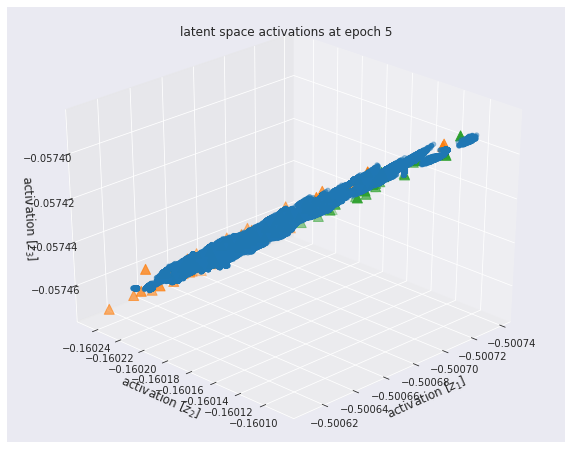

In [ ]:
# determine epoch of model to be evaluated
eval_epoch = 5

# collect latent space representation at a certain epochs 
z_representation = get_latent_space(encoder_model_name='ep_{}_encoder_model.pth'.format(eval_epoch))

# plot the latent space at a particular epoch
plot_latent_space(z_representation, label, epoch=eval_epoch)

Finally, you may want to save the content of the lab to your local machine. Therefore, please execute the cell below to retrieve an archived version of your current lab content.

最後に、ラボのコンテンツをローカルマシンに保存したい場合があります。そこで、以下のセルを実行して、現在のラボのコンテンツのアーカイブ版を取得してください。

In [ ]:
!tar -czf GTC_2018_Lab.tar.gz *

You may also want to execute the content of your lab outside of the jupyter notebook environment e.g. on compute node or server. The cell below converts the lab notebook into a standalone and executable python script.

また、実験内容を jupyter ノートブック環境の外で実行したい場合もあるでしょう（例：計算ノードやサーバー）。以下のセルは、ラボのノートブックをスタンドアロンで実行可能なPythonスクリプトに変換します。

In [ ]:
!jupyter nbconvert --to script GTC_2018_Lab.ipynb

## 8. Lab Summary

In this lab, we presented a step by step implementation of an autoencoder deep neural network based methodology to detect anomalies in financial data. The degree of a financial transaction "abnormity" is evaluated based on its respective reconstruction error. The code provided in this lab can be tailored to meet more complex fraud detection scenarios and datasets.

この研究室では、財務データの異常を検出するためのオートエンコーダー・ディープニューラルネットワークに基づく方法論を段階的に実装しました。財務取引の「異常」の度合いは、それぞれの再構築エラーに基づいて評価されます。この研究室で提供されたコードは、より複雑な不正検出シナリオやデータセットに合わせて調整することができます。

## <font color='red'>9. Post-Lab Exercises

<font color='red'>We recommend you to try the following exercises after the lab:  

ラボ終了後は、以下の練習問題に挑戦することをお勧めします。


<font color='red'>**1. Evaluation of shallow and deep autoencoder models**  

**浅いオートエンコーダーモデルと深いオートエンコーダーモデルの評価**  

<font color='red'>Try to train and evaluate further (shallow and deeper) autoencoder models (by removing and adding of fully-connected layers). Analyse the performance in terms of training time and reconstruction error.  

オートエンコーダーモデルをさらに（浅く、深く）学習・評価してみる（完全連結層を削除したり追加したりして）。学習時間と再構成誤差の観点から性能を分析する。


<font color='red'>**2. Comparison to other dimensionality reduction techniques  

他の次元削減手法との比較**

<font color='red'>Try using other dimensionality reduction techniques such as principal component analysis, non-negative matrix factorization or sparse coding and compare the detected anomalies with the ones detected by the autoencoder.  

主成分分析、非負行列分解、スパースコーディングなど、他の次元削減技術を使ってみて、検出された異常値とオートエンコーダーで検出された異常値を比較してみてください。

<font color='red'>**3. Review of additional autoencoder concepts  

オートエンコーダーの概念の再確認**

<font color='red'>Try using other autoencoder architectures such as variational [13] or adversarial [14] autoencoder and compare the results with the autoencoder architecture implemented above.  

変分法[13]や敵対法[14]などの他のオートエンコーダー・アーキテクチャーを使ってみて，上記で実装したオートエンコーダー・アーキテクチャーと結果を比較してみましょう．

## 10. References

Major elements of the lab content are inspired by the publication "Detection of Anomalies in Large Scale Accounting Data using Deep Autoencoder Networks", of M. Schreyer, T. Sattarov, D. S. Borth, A. Dengel, and B. Reimer, 2017 (arXiv preprint available under: https://arxiv.org/abs/1709.05254).  
ラボの内容の主要な要素は、M. Schreyer, T. Sattarov, D. S. Borth, A. Dengel, and B. Reimer, 2017の出版物「Detection of Anomalies in Large Scale Accounting Data using Deep Autoencoder Networks」に触発されています（arXiv preprint available under: https://arxiv.org/abs/1709.05254）。

[1] ACFE, "Report to the Nations on Occupational Fraud and Abuse", The 2016 Global Fraud Study, Association of Certified Fraud Examiners (ACFE), 2016.

[2] J. T. Wells, "Corporate Fraud Handbook: Prevention and Detection", John Wiley & Sons, 2017.

[3] PwC, "Pulling Fraud Out of the Shadows", The Global Economic Crime and Fraud Survey 2018, PricewaterhouseCoopers LLP, 2018.

[4] S. Markovitch, P. Willmott, "Accelerating the digitization of business processes", McKinsey & Company (2014) 1–5.

[5] SAP, SAP Global Corporate Affairs, Corporate Factsheet 2017, 2017.

[6] E. A. Lopez-Rojas , A. Elmir, and S. Axelsson, "PaySim: A financial mobile money simulator for fraud detection", In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus, 2016.

[7] G. E. Hinton, and R. R. Salakhutdinov, "Reducing the dimensionality of data with neural networks", science 313, no. 5786: 504-507, 2006.

[8] N. Srivastava, G. E. Hinton, A. Krizhevsky, I. Sutskever, and R. Salakhutdinov, "Dropout: A simple way to prevent neural networks from overfitting", The Journal of Machine Learning Research, 15(1), 1929-1958, 2014.

[9] X. Glorot and Y. Bengio, "Understanding the difficulty of training deep feedforward neural networks", Proceedings of the 13th International Conference on Artificial Intelligence and Statistics (AISTATS), 9:249–256, 2010.

[10] B. Xu, N. Wang, T. Chen, and M. Li, "Empirical Evaluation of Rectified Activations in Convolution Network", ICML Deep Learning Workshop, pages 1–5, 2015.

[11] D. P. Kingma and J. Ba, "Adam: A method for stochastic optimization", International Conference on Learning Representations (ICLR). 2015.

[12] G. E. Hinton, N. Srivastava, A. Krizhevsky, I. Sutskever, R. R. Salakhutdinov. "Improving neural networks by preventing co-adaptation of feature detectors", Technical Report, 2012.

[13] D. P. Kingma, M. Welling. "Auto-encoding variational bayes", arXiv preprint arXiv:1312.6114, 2013.

[14] Makhzani, A., Shlens, J., Jaitly, N., Goodfellow, I., & Frey, B., "Adversarial autoencoders", arXiv preprint arXiv:1511.05644, 2015.
